In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from config import client, client_secret

In [2]:
# define path to csv file
file_path = 'data/income-inequality-.csv'

# read csv intp pandas df
df = pd.read_csv(file_path)
df.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,Gini_index,LL_95CI,UL_95CI,se,rse,CA_decile,CA_RR,Median_HH_income,Median_HH_decile,version
0,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CA,6,California,NaN,NaN,...,0.468,0.465617,0.470383,0.001216,0.259787,NaN,NaN,NaN,NaN,03/26/2014 12:00:00 AM
1,556,Income inequality: Gini coefficient describing...,2006-2010,9,Total,CA,6,California,NaN,NaN,...,0.469,0.467809,0.470191,0.000608,0.129617,NaN,NaN,NaN,NaN,03/26/2014 12:00:00 AM
2,556,Income inequality: Gini coefficient describing...,2008-2010,9,Total,CA,6,California,NaN,NaN,...,0.471,0.468617,0.473383,0.001216,0.258133,NaN,NaN,NaN,NaN,03/26/2014 12:00:00 AM
3,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6001,Alameda,Alameda,6001.0,...,0.455,0.449043,0.460957,0.003040,0.668025,NaN,0.972222,66430.0,3.0,03/26/2014 12:00:00 AM
4,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6003,Alpine,Alpine,6003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/26/2014 12:00:00 AM


In [4]:
# drop rows where gini index or median household income is na
df = df.dropna(subset=['Gini_index', 'Median_HH_income'])
df.describe()

,ind_id,race_eth_code,geotypevalue,county_fips,region_code,Number_Households,Gini_index,LL_95CI,UL_95CI,se,rse,CA_decile,CA_RR,Median_HH_income,Median_HH_decile
count,1967.0,1967.0,1967.000000,1967.000000,1967.000000,1.967000e+03,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1807.000000,1967.000000,1967.000000,1967.000000
mean,556.0,9.0,40210.172852,6057.173869,8.791561,3.565121e+04,0.415964,0.372627,0.459301,0.022111,5.429507,5.170448,0.886523,63383.262328,5.496187
std,0.0,0.0,26203.920773,29.458529,4.941290,1.609551e+05,0.051717,0.060967,0.062142,0.017034,4.230913,2.675667,0.110191,26992.619504,2.864499
min,556.0,9.0,135.000000,6001.000000,1.000000,6.700000e+01,0.112000,0.048851,0.175149,0.001216,0.247618,1.000000,0.238806,13588.000000,1.000000
25%,556.0,9.0,15522.000000,6037.000000,4.000000,1.703500e+03,0.386000,0.340117,0.420074,0.010334,2.541930,3.000000,0.823028,45191.500000,3.000000
50%,556.0,9.0,40354.000000,6059.000000,10.000000,8.838000e+03,0.413000,0.377319,0.449319,0.016413,3.993522,5.000000,0.880597,57240.000000,6.000000
75%,556.0,9.0,61068.000000,6079.000000,14.000000,2.311700e+04,0.444000,0.410245,0.487149,0.028571,6.956782,7.000000,0.946638,75753.000000,8.000000
max,556.0,9.0,87090.000000,6115.000000,14.000000,3.241204e+06,0.682000,0.577532,0.935213,0.156231,28.766826,10.000000,1.454158,223611.000000,10.000000


Text(0.5, 1.0, 'Gini_index vs Number of Households')

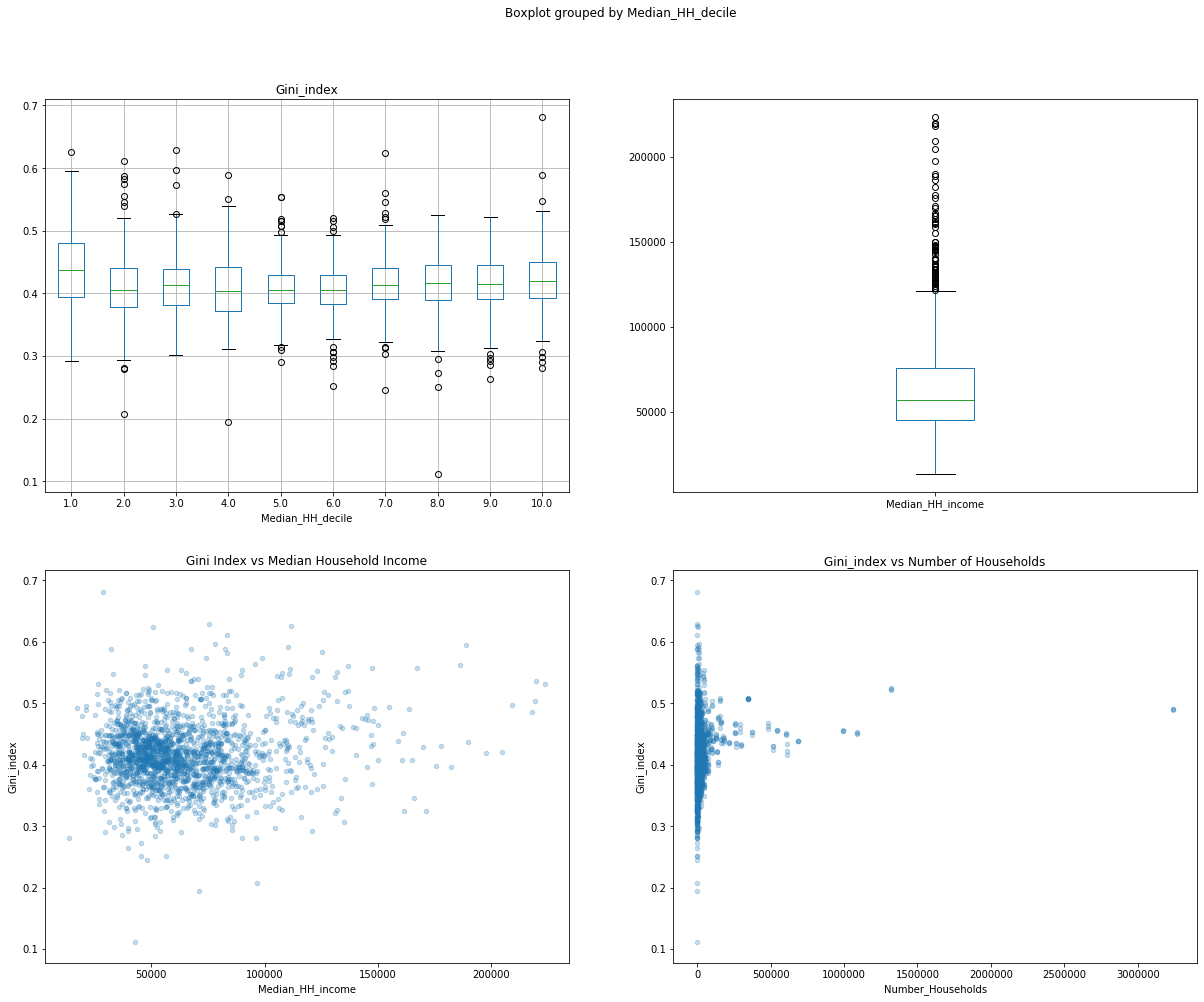

In [5]:
# let's visually explore the data
# create figure and axes objects for the subplots. These are graphed in a 2 x 2 grid
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# make the top row box plots for gini and median incomes. This will visualize outliers
df.boxplot(by='Median_HH_decile', column='Gini_index', ax=ax1)
df.plot(kind='box', y='Median_HH_income', ax=ax2)

# Use the bottom row for scatter plots showing relationships between variables
df.plot(kind='scatter', x='Median_HH_income', y='Gini_index', ax=ax3, alpha=0.25)
ax3.set_title('Gini Index vs Median Household Income')

df.plot(kind='scatter', x='Number_Households', y='Gini_index', ax=ax4, alpha=0.25)
ax4.set_title('Gini_index vs Number of Households')

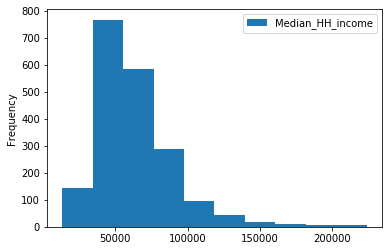

In [6]:
df.plot(kind='hist', y='Median_HH_income', x='reportyear')

In [7]:
# make request to 4square api. Use the county name from the previous df for the locations
# get names of each unique county
counties = df['county_name'].unique()
print(f'There are {len(counties)} unique counties in CA')

There are 58 unique counties in CA


In [8]:
# what about cities (geoname)?
cities = df['geoname'].unique()
print(f'There are {len(cities)} unique cities in this dataset')

There are 1191 unique cities in this dataset


In [9]:
# load venues data into df
venues_df = pd.read_csv('data/venues_data.csv')
print('Dataframe saved to csv!')

Dataframe saved to csv!


In [10]:
# What are the value counts for each county?
venue_counts = venues_df['Primary category'].value_counts()
venue_counts

Coffee Shop                 216
Mexican Restaurant          186
American Restaurant         156
Pizza Place                 138
Sandwich Place              118
Burger Joint                114
Italian Restaurant           80
Café                         79
Brewery                      74
Seafood Restaurant           72
Bakery                       72
Ice Cream Shop               66
Sushi Restaurant             63
Breakfast Spot               63
Fast Food Restaurant         63
Bar                          49
Diner                        46
New American Restaurant      44
Deli / Bodega                39
BBQ Joint                    39
Steakhouse                   37
Restaurant                   36
Chinese Restaurant           34
Wine Bar                     33
Japanese Restaurant          32
Thai Restaurant              28
Winery                       24
Mediterranean Restaurant     23
Dessert Shop                 20
Indian Restaurant            19
                           ... 
Food    

In [11]:
df

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,Gini_index,LL_95CI,UL_95CI,se,rse,CA_decile,CA_RR,Median_HH_income,Median_HH_decile,version
3,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6001,Alameda,Alameda,6001.0,...,0.455,0.449043,0.460957,0.003040,0.668025,NaN,0.972222,66430.0,3.0,03/26/2014 12:00:00 AM
5,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6005,Amador,Amador,6005.0,...,0.409,0.378021,0.439979,0.015805,3.864418,NaN,0.873932,57522.0,4.0,03/26/2014 12:00:00 AM
6,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6007,Butte,Butte,6007.0,...,0.450,0.440468,0.459532,0.004863,1.080716,NaN,0.961538,40011.0,9.0,03/26/2014 12:00:00 AM
7,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6009,Calaveras,Calaveras,6009.0,...,0.396,0.367404,0.424596,0.014590,3.684259,NaN,0.846154,54356.0,5.0,03/26/2014 12:00:00 AM
8,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6011,Colusa,Colusa,6011.0,...,0.440,0.401872,0.478128,0.019453,4.421111,NaN,0.940171,42398.0,8.0,03/26/2014 12:00:00 AM
9,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6013,Contra Costa,Contra Costa,6013.0,...,0.449,0.443043,0.454957,0.003040,0.676952,NaN,0.959402,75483.0,1.0,03/26/2014 12:00:00 AM
10,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6015,Del Norte,Del Norte,6015.0,...,0.444,0.413021,0.474979,0.015805,3.559791,NaN,0.948718,33173.0,10.0,03/26/2014 12:00:00 AM
11,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6017,El Dorado,El Dorado,6017.0,...,0.434,0.419702,0.448298,0.007295,1.680837,NaN,0.927350,68640.0,2.0,03/26/2014 12:00:00 AM
12,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6019,Fresno,Fresno,6019.0,...,0.453,0.444660,0.461340,0.004255,0.939364,NaN,0.967949,44979.0,7.0,03/26/2014 12:00:00 AM
13,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6021,Glenn,Glenn,6021.0,...,0.437,0.389340,0.484660,0.024316,5.564327,NaN,0.933761,39834.0,9.0,03/26/2014 12:00:00 AM


In [166]:
# get the frequency of each venue for each county. 
# One hot encode the venue categories
one_hot_venues = pd.get_dummies(venues_df, columns=['Primary category'], prefix='', prefix_sep='')
# gorup by the counties by mean to get the frequency opf each category
freq_df = one_hot_venues.groupby('County').mean()
freq_df

,Price,Afghan Restaurant,American Restaurant,Aquarium,Argentinian Restaurant,Art Museum,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Tiki Bar,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Zoo
County,,,,,,,,,,,,,,,,,,,,,
Alameda,1.524590,0.016393,0.032787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032787,...,0.016393,0.000000,0.032787,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.000000
Alpine,1.424242,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.060606,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Amador,1.606061,0.000000,0.121212,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.030303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000
Butte,1.630769,0.000000,0.015385,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.015385,...,0.000000,0.000000,0.015385,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000
Calaveras,1.394737,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.026316,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Colusa,1.333333,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Contra Costa,1.826667,0.000000,0.066667,0.000000,0.000000,0.000000,0.013333,0.026667,0.000000,0.013333,...,0.000000,0.013333,0.026667,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000
Del Norte,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
El Dorado,1.481481,0.000000,0.074074,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [170]:
# merge the economic and venue data
econ_venue_merged_df = pd.merge(df, freq_df, left_on = 'county_name', right_on='County')
econ_venue_merged_df

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,Tiki Bar,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Zoo
0,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6001,Alameda,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
1,556,Income inequality: Gini coefficient describing...,2006-2010,9,Total,CO,6001,Alameda,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
2,556,Income inequality: Gini coefficient describing...,2008-2010,9,Total,CO,6001,Alameda,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
3,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,PL,562,Alameda city,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
4,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,PL,2980,Ashland CDP,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
5,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,PL,6000,Berkeley city,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
6,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,PL,11964,Castro Valley CDP,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
7,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,PL,20018,Dublin city,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
8,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,PL,26000,Fremont city,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
9,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,PL,33000,Hayward city,Alameda,6001.0,...,0.016393,0.0,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0


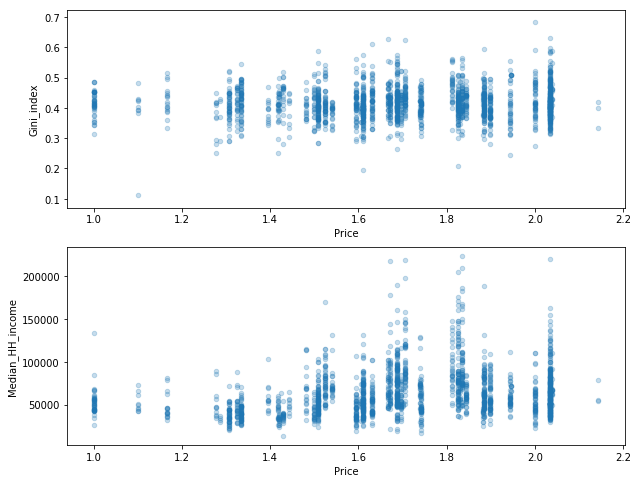

In [180]:
# make visualizations
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
econ_venue_merged_df.plot(kind='scatter', x='Price', y='Gini_index', ax=ax1, alpha=0.25)
ax2 = fig.add_subplot(212)
econ_venue_merged_df.plot(kind='Scatter', x = 'Price', y='Median_HH_income', alpha=0.25, ax=ax2)